In [1]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_C60_ro_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [2]:
data

['t_n103        37.0556 (33.5650, 44.0964) (33.4706, 43.2119)  9.7413 (Jnode 202)\n',
 't_n104         6.4403 ( 4.4392,  9.1149) ( 4.3114,  8.8595)  4.5481 (Jnode 201)\n',
 't_n105         6.1482 ( 4.2722,  8.6738) ( 4.0038,  8.3425)  4.3387 (Jnode 200)\n',
 't_n106         5.3720 ( 3.7554,  7.5662) ( 3.5554,  7.2940)  3.7386 (Jnode 199)\n',
 't_n107         5.1992 ( 3.6394,  7.3107) ( 3.4359,  7.0506)  3.6147 (Jnode 198)\n',
 't_n108         4.8750 ( 3.4093,  6.8434) ( 3.3067,  6.6709)  3.3642 (Jnode 197)\n',
 't_n109         2.1144 ( 1.4495,  2.9845) ( 1.4012,  2.9128)  1.5116 (Jnode 196)\n',
 't_n110         2.0972 ( 1.4384,  2.9608) ( 1.3689,  2.8661)  1.4972 (Jnode 195)\n',
 't_n111         2.0398 ( 1.3975,  2.8782) ( 1.3303,  2.7859)  1.4556 (Jnode 194)\n',
 't_n112         1.9712 ( 1.3483,  2.7811) ( 1.3090,  2.7169)  1.4079 (Jnode 193)\n',
 't_n113         1.8826 ( 1.2877,  2.6583) ( 1.2490,  2.5925)  1.3435 (Jnode 192)\n',
 't_n114         1.3767 ( 0.9349,  1.9694) ( 0.9051,  

In [3]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [4]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
    if line[3].startswith('('):
        lower_ci_iqtree.append(float(line[3][1:-1]))
    else:
        lower_ci_iqtree.append(float(line[3][1:-1]))
    if line[4].startswith('('):
        upper_ci_iqtree.append(float(line[4][1:-1]))
    else:
        upper_ci_iqtree.append(float(line[4][:-1]))
    # posterior_mean_baseml.append(float(line[4]))
    # lower_ci_baseml.append(float(line[5]))
    # upper_ci_baseml.append(float(line[6]))

for line in mu_data:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_iqtree.append(float(line[1]))
    lower_ci_mu_iqtree.append(float(line[3][:-1]))
    upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [5]:
node_name

['t_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107',
 't_n108',
 't_n109',
 't_n110',
 't_n111',
 't_n112',
 't_n113',
 't_n114',
 't_n115',
 't_n116',
 't_n117',
 't_n118',
 't_n119',
 't_n120',
 't_n121',
 't_n122',
 't_n123',
 't_n124',
 't_n125',
 't_n126',
 't_n127',
 't_n128',
 't_n129',
 't_n130',
 't_n131',
 't_n132',
 't_n133',
 't_n134',
 't_n135',
 't_n136',
 't_n137',
 't_n138',
 't_n139',
 't_n140',
 't_n141',
 't_n142',
 't_n143',
 't_n144',
 't_n145',
 't_n146',
 't_n147',
 't_n148',
 't_n149',
 't_n150',
 't_n151',
 't_n152',
 't_n153',
 't_n154',
 't_n155',
 't_n156',
 't_n157',
 't_n158',
 't_n159',
 't_n160',
 't_n161',
 't_n162',
 't_n163',
 't_n164',
 't_n165',
 't_n166',
 't_n167',
 't_n168',
 't_n169',
 't_n170',
 't_n171',
 't_n172',
 't_n173',
 't_n174',
 't_n175',
 't_n176',
 't_n177',
 't_n178',
 't_n179',
 't_n180',
 't_n181',
 't_n182',
 't_n183',
 't_n184',
 't_n185',
 't_n186',
 't_n187',
 't_n188',
 't_n189',
 't_n190',
 't_n191',
 't_n192',
 't_n193',

In [6]:
posterior_mean_iqtree

[37.0556,
 6.4403,
 6.1482,
 5.372,
 5.1992,
 4.875,
 2.1144,
 2.0972,
 2.0398,
 1.9712,
 1.8826,
 1.3767,
 0.9735,
 0.7413,
 0.3777,
 1.436,
 1.2346,
 1.9541,
 1.2805,
 1.874,
 1.4945,
 1.2117,
 0.987,
 1.8135,
 1.71,
 0.4388,
 2.0093,
 1.8121,
 1.3837,
 1.0998,
 1.2464,
 1.133,
 0.9469,
 0.8772,
 4.5274,
 3.5496,
 4.9302,
 4.4653,
 4.1338,
 3.3629,
 1.7254,
 3.2339,
 2.8286,
 2.5108,
 2.1412,
 4.0071,
 3.6637,
 0.7612,
 0.3302,
 5.719,
 5.3472,
 4.7908,
 4.6172,
 4.9871,
 3.2331,
 4.0455,
 3.1754,
 6.1633,
 5.7159,
 5.1307,
 4.8276,
 4.0556,
 2.6692,
 3.5791,
 5.0475,
 1.461,
 5.0757,
 2.9028,
 2.8001,
 2.7255,
 2.5611,
 2.337,
 2.2246,
 2.1414,
 2.0439,
 1.8149,
 1.5684,
 1.3055,
 1.8459,
 1.7383,
 1.3789,
 1.5675,
 2.0061,
 1.8492,
 1.7091,
 1.4607,
 1.0085,
 1.8919,
 1.6981,
 1.5014,
 2.2194,
 2.1052,
 1.9956,
 1.765,
 1.2918,
 1.9793,
 1.0793,
 0.8631,
 0.3193,
 2.7965,
 2.3584]

In [7]:
lower_ci_iqtree

[4.0964,
 0.4392,
 0.2722,
 0.7554,
 0.6394,
 0.4093,
 0.4495,
 0.4384,
 0.3975,
 0.3483,
 0.2877,
 0.9349,
 0.6471,
 0.4869,
 0.2317,
 0.975,
 0.8347,
 0.3375,
 0.8521,
 0.2839,
 0.0178,
 0.8162,
 0.6427,
 0.2407,
 0.1674,
 0.2608,
 0.3766,
 0.241,
 0.9397,
 0.7398,
 0.8387,
 0.7601,
 0.6307,
 0.553,
 0.164,
 0.4055,
 0.4493,
 0.1306,
 0.8915,
 0.3105,
 0.0565,
 0.2149,
 0.9193,
 0.6883,
 0.4225,
 0.7779,
 0.5112,
 0.3883,
 0.1634,
 0.9787,
 0.7148,
 0.3126,
 0.1774,
 0.4526,
 0.0769,
 0.7554,
 0.096,
 0.2569,
 0.954,
 0.5385,
 0.3187,
 0.7651,
 0.7052,
 0.414,
 0.4662,
 0.7359,
 0.4726,
 0.8409,
 0.7767,
 0.7301,
 0.6273,
 0.4901,
 0.4182,
 0.3676,
 0.3057,
 0.1571,
 0.997,
 0.8268,
 0.1751,
 0.1068,
 0.8739,
 0.9981,
 0.2795,
 0.1802,
 0.0885,
 0.9298,
 0.6326,
 0.207,
 0.0807,
 0.9523,
 0.414,
 0.3404,
 0.2735,
 0.1255,
 0.8133,
 0.2577,
 0.6407,
 0.5076,
 0.1782,
 0.7713,
 0.4906]

In [8]:
upper_ci_iqtree

[33.4706,
 9.1149,
 8.6738,
 7.5662,
 7.3107,
 6.8434,
 2.9845,
 2.9608,
 2.8782,
 2.7811,
 2.6583,
 1.9694,
 1.4129,
 1.0893,
 0.5858,
 2.0468,
 1.7729,
 2.7592,
 1.8511,
 2.646,
 2.1207,
 1.7377,
 1.4552,
 2.5634,
 2.4167,
 0.6934,
 2.8379,
 2.5588,
 1.9751,
 1.5832,
 1.7855,
 1.6303,
 1.3697,
 1.3162,
 6.3526,
 5.0737,
 6.9265,
 6.2634,
 5.8058,
 4.7738,
 2.6415,
 4.5897,
 4.038,
 3.6039,
 3.1093,
 5.6554,
 5.2078,
 1.3169,
 0.5994,
 8.0685,
 7.5559,
 6.7887,
 6.5666,
 7.0549,
 4.7703,
 5.8032,
 4.6457,
 8.714,
 8.0837,
 7.2695,
 6.8357,
 5.7953,
 3.9675,
 5.1629,
 7.1722,
 2.5006,
 7.215,
 4.3652,
 4.1967,
 4.0838,
 3.8345,
 3.4876,
 3.3156,
 3.1879,
 3.0412,
 2.7067,
 2.3475,
 1.9611,
 2.7533,
 2.5941,
 2.073,
 2.3451,
 2.9826,
 2.7531,
 2.5494,
 2.1829,
 1.5305,
 2.8182,
 2.5322,
 2.2451,
 3.3067,
 3.1407,
 2.9793,
 2.644,
 1.9631,
 2.9597,
 1.7097,
 1.3837,
 0.5369,
 4.2084,
 3.5596]

In [9]:
file_LG = open("LG_ro_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_baseml.append(float(line[3][1:-1]))
#     else:
#          lower_ci_baseml.append(float(line[3][:-1]))
#     if line[4].startswith('('):
#         upper_ci_baseml.append(float(line[4][1:-1]))
#     else:
#          upper_ci_baseml.append(float(line[4][:-1]))
#         
#     
# for line in mu_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_baseml.append(float(line[1]))
#     lower_ci_mu_baseml.append(float(line[3][:-1]))
#     upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

In [10]:
# import matplotlib.pyplot as plt
# import numpy as np
# 
# # # Example data
# # # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# # posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# # posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# # 
# # # Credible intervals for MCMCtree
# # lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# # upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# # 
# # # Credible intervals for McmcDate
# # lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# # upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]
# 
# # Calculate error bars
# xerr = [np.array(lower_ci_baseml), 
#         np.array(upper_ci_baseml)]
# yerr = [np.array(lower_ci_iqtree), 
#         np.array(upper_ci_iqtree)]
# 
# # Plotting
# fig, ax = plt.subplots(figsize=(15, 15))
# ax.plot([-0.1,90], 
#         [-0.1, 90], 
#         'k--', label='y=x')
# ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
#             xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')
# 
# # Labels and title
# ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
# ax.set_ylabel('Posterior mean age LG+G4+C60 [100 Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and LG+G4+C60 models [All calibrations]')
# ax.legend()
# 
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_C60_all.png')

In [11]:
posterior_mean_baseml

[37.1159,
 6.4587,
 6.011,
 5.2314,
 4.9871,
 4.4758,
 2.1077,
 2.0779,
 1.9691,
 1.8609,
 1.7533,
 1.2728,
 0.9021,
 0.6597,
 0.3845,
 1.3489,
 1.1074,
 1.8557,
 1.2007,
 1.7527,
 1.3765,
 1.0917,
 0.9903,
 1.7187,
 1.5835,
 0.5032,
 1.9458,
 1.709,
 1.3037,
 1.0247,
 1.189,
 1.044,
 0.8434,
 0.9303,
 4.0844,
 3.2957,
 4.6328,
 4.1149,
 3.6905,
 2.9752,
 1.6373,
 2.9332,
 2.4668,
 2.1175,
 1.7375,
 3.6717,
 3.2818,
 0.9006,
 0.4105,
 5.3143,
 4.7918,
 4.1165,
 4.0314,
 4.5179,
 2.9746,
 3.6644,
 2.766,
 6.1641,
 5.6355,
 4.9524,
 4.5204,
 3.8065,
 2.6704,
 3.2571,
 4.8274,
 1.792,
 4.8896,
 3.7801,
 3.3815,
 3.167,
 2.9164,
 2.603,
 2.4326,
 2.2856,
 2.1074,
 1.8146,
 1.5247,
 1.2567,
 1.8598,
 1.7153,
 1.3417,
 1.464,
 2.0981,
 1.8748,
 1.667,
 1.397,
 0.9634,
 1.9009,
 1.677,
 1.4333,
 2.3836,
 2.184,
 1.981,
 1.6896,
 1.1776,
 2.0486,
 1.3875,
 1.063,
 0.4227,
 3.5371,
 2.9204]

In [12]:
posterior_mean_iqtree

[37.0556,
 6.4403,
 6.1482,
 5.372,
 5.1992,
 4.875,
 2.1144,
 2.0972,
 2.0398,
 1.9712,
 1.8826,
 1.3767,
 0.9735,
 0.7413,
 0.3777,
 1.436,
 1.2346,
 1.9541,
 1.2805,
 1.874,
 1.4945,
 1.2117,
 0.987,
 1.8135,
 1.71,
 0.4388,
 2.0093,
 1.8121,
 1.3837,
 1.0998,
 1.2464,
 1.133,
 0.9469,
 0.8772,
 4.5274,
 3.5496,
 4.9302,
 4.4653,
 4.1338,
 3.3629,
 1.7254,
 3.2339,
 2.8286,
 2.5108,
 2.1412,
 4.0071,
 3.6637,
 0.7612,
 0.3302,
 5.719,
 5.3472,
 4.7908,
 4.6172,
 4.9871,
 3.2331,
 4.0455,
 3.1754,
 6.1633,
 5.7159,
 5.1307,
 4.8276,
 4.0556,
 2.6692,
 3.5791,
 5.0475,
 1.461,
 5.0757,
 2.9028,
 2.8001,
 2.7255,
 2.5611,
 2.337,
 2.2246,
 2.1414,
 2.0439,
 1.8149,
 1.5684,
 1.3055,
 1.8459,
 1.7383,
 1.3789,
 1.5675,
 2.0061,
 1.8492,
 1.7091,
 1.4607,
 1.0085,
 1.8919,
 1.6981,
 1.5014,
 2.2194,
 2.1052,
 1.9956,
 1.765,
 1.2918,
 1.9793,
 1.0793,
 0.8631,
 0.3193,
 2.7965,
 2.3584]

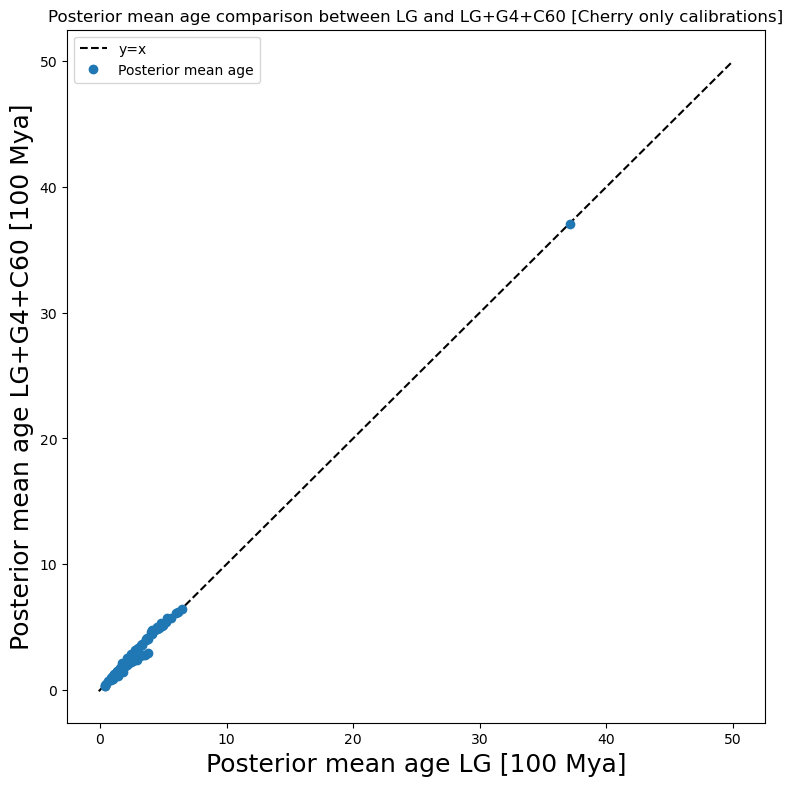

In [13]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,50], 
        [-0.1, 50], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
ax.set_ylabel('Posterior mean age LG+G4+C60 [100 Mya]', fontsize=18)
ax.set_title('Posterior mean age comparison between LG and LG+G4+C60 [Cherry only calibrations]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_C60_ro_scatter.png')

In [14]:
# fig, ax = plt.subplots(figsize=(9 ,9))
# ax.plot([0.01,0.04], 
#         [0.01, 0.04], 
#         'k--', label='y=x')
# ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
#  
# # Labels and title
# ax.set_xlabel('Posterior mean rate [LG]', fontsize=18)
# ax.set_ylabel('Posterior mean rate [LG+G4+C20]', fontsize=18)
# ax.set_title('Posterior mean rate comparison between LG and LG+G4+C60 [Cherry only calibration/IQ-TREE]')
# ax.legend()
# 
# # point_x = posterior_mean_baseml[0]  # Example: first point in the list
# # point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# # ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin__posterior_mean_rate_comparison_LG_G4_C20_all_scatter.png')